In [1]:
import tensorflow as tf
import keras as keras
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:

# import os                       # for working with files
# import numpy as np              # for numerical computationss
# import pandas as pd             # for working with dataframes
# import torch                    # Pytorch module 
# import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
# import torch.nn as nn           # for creating  neural networks
# from torch.utils.data import DataLoader # for dataloaders 
# from PIL import Image           # for checking images
# import torch.nn.functional as F # for functions for calculating loss
# import torchvision.transforms as transforms   # for transforming images into tensors 
# from torchvision.utils import make_grid       # for data checking
# from torchvision.datasets import ImageFolder  # for working with classes and images
# from torchsummary import summary              # for getting the summary of our model

# %matplotlib inline

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'D:/PROJECTS/DISEASE_PREDICTION_NEW/Plant_diseases/train',
    labels = "inferred",
    label_mode = "categorical",
    class_names = None,
    color_mode = "rgb",
    batch_size = 32,
    image_size = (128,128),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = "bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False,
    data_format = None,
)

Found 49179 files belonging to 39 classes.


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'D:/PROJECTS/DISEASE_PREDICTION_NEW/Plant_diseases/test',
    labels = "inferred",
    label_mode = "categorical",
    class_names = None,
    color_mode = "rgb",
    batch_size = 32,
    image_size = (128,128),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = "bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False,
    data_format = None,
)

Found 12307 files belonging to 39 classes.


In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 39), dtype=tf.float32, name=None))>

In [9]:
validation_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 39), dtype=tf.float32, name=None))>

In [13]:
for x,y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break
    

tf.Tensor(
[[[[174.08667  176.3623   168.58105 ]
   [169.00513  176.19385  160.59766 ]
   [102.98242  118.141846  89.68237 ]
   ...
   [168.89648  158.89648  167.89648 ]
   [166.76562  156.76562  165.76562 ]
   [170.50244  160.50244  169.50244 ]]

  [[149.61792  157.96167  142.9917  ]
   [108.81323  121.93823  100.23877 ]
   [ 68.08911   86.77661   55.583008]
   ...
   [167.0647   157.0647   166.0647  ]
   [151.77954  141.77954  150.77954 ]
   [147.58643  137.58643  146.58643 ]]

  [[101.19043  117.88721   93.55298 ]
   [ 78.34619   98.87134   70.34619 ]
   [ 74.01758   98.907715  62.06494 ]
   ...
   [170.27197  160.27197  169.27197 ]
   [170.9524   160.9524   169.9524  ]
   [161.98462  151.98462  160.98462 ]]

  ...

  [[184.16553  176.16553  187.16553 ]
   [182.62158  174.62158  185.62158 ]
   [184.20337  176.20337  187.20337 ]
   ...
   [180.0188   173.0188   181.0188  ]
   [188.63013  181.63013  189.63013 ]
   [182.23828  175.23828  183.23828 ]]

  [[184.51562  176.51562  187.5156

In [15]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [17]:
model = Sequential()

In [19]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape = [128, 128, 3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides= 2))

C:\Users\MAYA\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides= 2))

In [25]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides= 2))

In [27]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides= 2))

In [29]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides= 2))

In [31]:
model.add(Flatten())

In [33]:
model.add(Dense(units = 1500, activation = 'relu'))

In [35]:
model.add(Dropout(0.4))

In [37]:
#Output layer
model.add(Dense(units = 39, activation = 'softmax'))

In [39]:
model.compile(optimizer = tf.keras.optimizers.Adam (
    learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics =['accuracy'])

In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 3, 3, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │       769,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 39)             │        58,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,614,119 (21.42 MB)

 Trainable params: 5,614,119 (21.42 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
###Model training

In [45]:
training_history = model.fit(x = training_set, validation_data = validation_set, epochs = 10)

Epoch 1/10
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 2442s 2s/step - accuracy: 0.4046 - loss: 2.1832 - val_accuracy: 0.8108 - val_loss: 0.6127
Epoch 2/10
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 2291s 1s/step - accuracy: 0.8008 - loss: 0.6345 - val_accuracy: 0.8491 - val_loss: 0.4801
Epoch 3/10
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 2280s 1s/step - accuracy: 0.8760 - loss: 0.3853 - val_accuracy: 0.8941 - val_loss: 0.3351
Epoch 4/10
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 2407s 2s/step - accuracy: 0.9157 - loss: 0.2612 - val_accuracy: 0.9236 - val_loss: 0.2440
Epoch 5/10
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 1914s 1s/step - accuracy: 0.9422 - loss: 0.1831 - val_accuracy: 0.9276 - val_loss: 0.2390
Epoch 6/10
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 1924s 1s/step - accuracy: 0.9544 - loss: 0.1402 - val_accuracy: 0.9272 - val_loss: 0.2371
Epoch 7/10
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 1935s 1s/step - accuracy: 0.9634 - loss: 0.1173 - val_accuracy: 0.9378 - val_loss: 0.2177
Epoch 8/10
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 1941s 1s/step - accuracy: 0.9700 -

In [47]:
#Model evaluation
train_loss, train_acc = model.evaluate(training_set)

1537/1537 ━━━━━━━━━━━━━━━━━━━━ 453s 295ms/step - accuracy: 0.9823 - loss: 0.0530


In [49]:
print(train_loss, train_acc)

0.04776911810040474 0.9842615723609924


In [51]:
val_loss, val_acc = model.evaluate(validation_set)

385/385 ━━━━━━━━━━━━━━━━━━━━ 121s 313ms/step - accuracy: 0.9361 - loss: 0.2715


In [53]:
print(val_loss, val_acc)

0.25781264901161194 0.9354838728904724


In [55]:
#Saving model

In [68]:
model.save("trained_model.keras")

In [70]:
training_history.history

{'accuracy': [0.5845584273338318,
  0.8253726363182068,
  0.8882043361663818,
  0.920819878578186,
  0.9432074427604675,
  0.9544724225997925,
  0.9636836647987366,
  0.970698893070221,
  0.9735252857208252,
  0.9756399989128113],
 'loss': [1.4437917470932007,
  0.5517893433570862,
  0.34708908200263977,
  0.2465728223323822,
  0.17440712451934814,
  0.1382800191640854,
  0.11356799304485321,
  0.09202693402767181,
  0.08180750906467438,
  0.07458239048719406],
 'val_accuracy': [0.8108393549919128,
  0.8491102457046509,
  0.8941252827644348,
  0.9236207008361816,
  0.9276021718978882,
  0.9271959066390991,
  0.9378402829170227,
  0.9241082072257996,
  0.9203705191612244,
  0.9354838728904724],
 'val_loss': [0.6126882433891296,
  0.48014646768569946,
  0.3351326584815979,
  0.24399413168430328,
  0.23896647989749908,
  0.2371317595243454,
  0.21771126985549927,
  0.28539586067199707,
  0.2991254925727844,
  0.25781282782554626]}

In [78]:
import json
with open("training_hist.json", "w") as f:
    json.dump(training_history.history, f)

In [80]:
### Accuracy Visualization

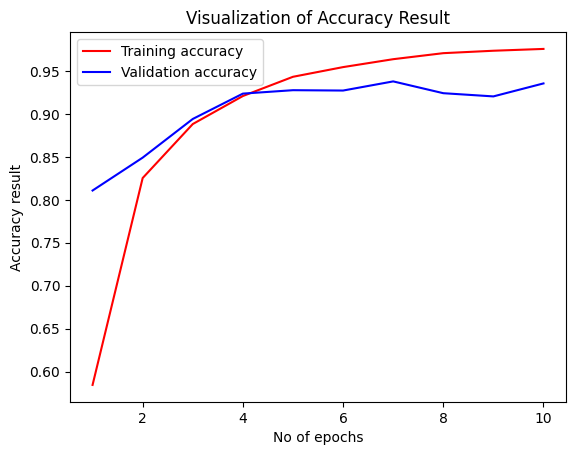

In [98]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label = 'Training accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label = 'Validation accuracy')
plt.xlabel("No of epochs")
plt.ylabel("Accuracy result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [100]:
#Some other metrics for model evaluation
class_name =  validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Background_without_leaves',
 'Blueberry___healthy',
 'Cherry___Powdery_mildew',
 'Cherry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___Northern_Leaf_Blight',
 'Corn___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot'

In [102]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'D:/PROJECTS/DISEASE_PREDICTION_NEW/Plant_diseases/test',
    labels = "inferred",
    label_mode = "categorical",
    class_names = None,
    color_mode = "rgb",
    batch_size = 32,
    image_size = (128,128),
    shuffle = False,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = "bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False,
    )

Found 12307 files belonging to 39 classes.


In [106]:
y_pred = model.predict(test_set)
y_pred

385/385 ━━━━━━━━━━━━━━━━━━━━ 111s 289ms/step


array([[4.82983857e-01, 4.24382696e-10, 2.98932125e-12, ...,
        1.24950961e-12, 2.58282595e-09, 1.15137492e-11],
       [9.99999881e-01, 3.76640351e-11, 2.45267436e-14, ...,
        1.62483895e-15, 4.40843889e-11, 1.61901454e-14],
       [4.10857946e-02, 2.31078339e-08, 4.74386148e-08, ...,
        8.65712835e-09, 5.05030675e-06, 2.03916972e-08],
       ...,
       [2.77183929e-08, 2.54177929e-11, 1.55308999e-06, ...,
        1.99702193e-08, 4.05998603e-11, 9.98255432e-01],
       [1.08341339e-06, 9.82098136e-09, 1.03958202e-08, ...,
        8.08885903e-10, 9.05927067e-09, 9.99909043e-01],
       [5.35408290e-05, 6.56640896e-06, 1.38412508e-06, ...,
        1.00101616e-07, 1.22103302e-06, 9.94818628e-01]], dtype=float32)

In [108]:
y_pred.shape

(12307, 39)

In [112]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(12307,), dtype=int64, numpy=array([28,  0,  3, ..., 38, 38, 38], dtype=int64)>

In [114]:
true_categories = tf.concat([y for x, y in test_set], axis = 0)
true_categories

<tf.Tensor: shape=(12307, 39), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [118]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(12307,), dtype=int64, numpy=array([ 0,  0,  0, ..., 38, 38, 38], dtype=int64)>

In [120]:
# Precision recall

In [128]:
from sklearn.metrics import classification_report, confusion_matrix

In [130]:
print(classification_report(Y_true, predicted_categories, target_names = class_name))

                                               precision    recall  f1-score   support

                           Apple___Apple_scab       0.84      0.88      0.86       200
                            Apple___Black_rot       0.93      0.91      0.92       200
                     Apple___Cedar_apple_rust       0.88      0.98      0.93       200
                              Apple___healthy       0.87      0.93      0.90       329
                    Background_without_leaves       0.95      0.95      0.95       229
                          Blueberry___healthy       0.93      0.97      0.95       301
                      Cherry___Powdery_mildew       0.95      0.99      0.97       211
                             Cherry___healthy       0.95      0.93      0.94       200
   Corn___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.74      0.82       200
                           Corn___Common_rust       0.96      1.00      0.98       239
                  Corn___Northern_Leaf_Bli

In [137]:
cm = confusion_matrix(Y_true, predicted_categories)
cm.shape

(39, 39)

In [139]:
cm

array([[ 175,    1,    0, ...,    0,    0,    0],
       [   3,  181,    0, ...,    0,    0,    0],
       [   0,    0,  197, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ..., 1062,    0,    0],
       [   2,    0,    0, ...,    0,  193,    0],
       [   0,    0,    0, ...,    0,    0,  295]], dtype=int64)

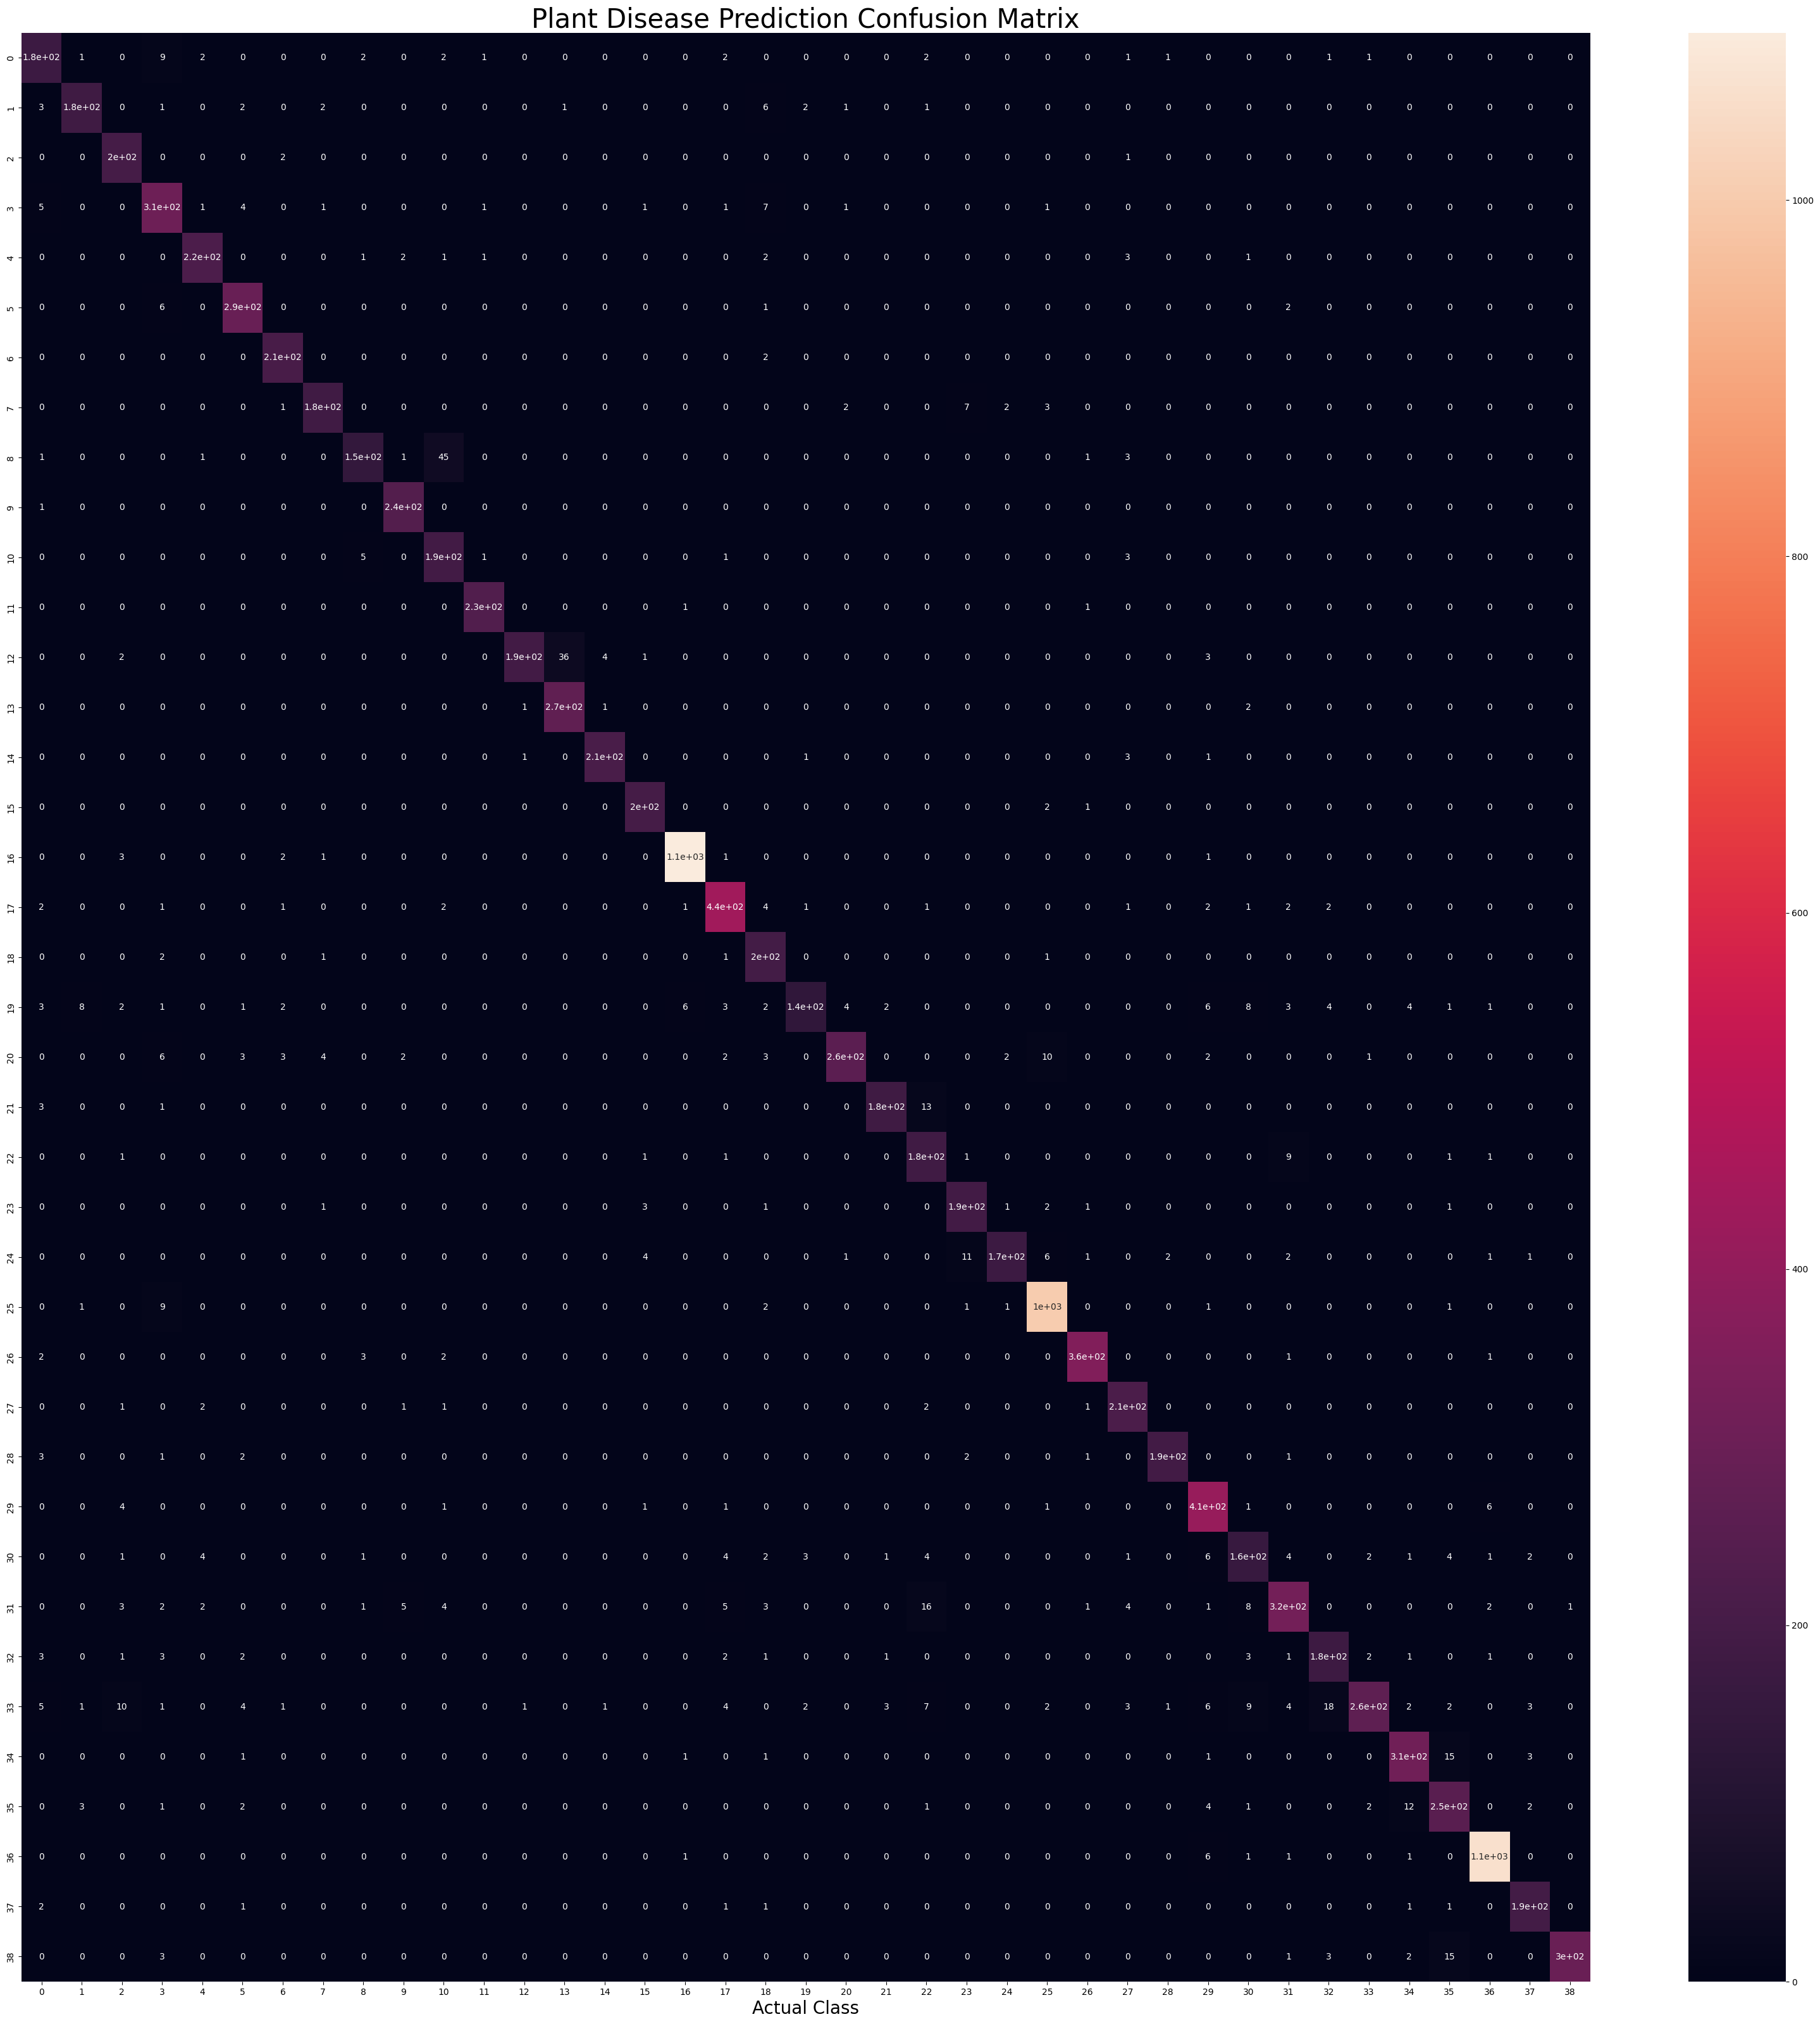

In [147]:
#Confusion matrix visualization
plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot =True, annot_kws = {'size': 10})
plt.xlabel("Predicted Class", fontsize = 20)
plt.xlabel("Actual Class", fontsize = 20)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=30)
plt.show()